### Tests on parameter optimization

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from scipy.optimize import minimize, Bounds

In [126]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
#all_data = pd.read_csv('../data/train_{}.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers
all_data

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.83250   800  23.664093     917.580527   
1     2           8000  0.2  0.065   6.47625  1040  28.025455    1817.287671   
2     3           8000  0.2  0.075   8.42100  1200  24.258964    2600.600669   
3     4           8000  0.2  0.100   6.81600  1600  23.584906    4141.970983   
4     5           8000  0.4  0.050  12.51250   800  43.182927    1232.354156   
..  ...            ...  ...    ...       ...   ...        ...            ...   
95   96          16000  0.8  0.100   2.92575  3200  32.663636  126860.571274   
96   97          16000  1.0  0.050   6.09400  1600  16.813433   51788.152328   
97   98          16000  1.0  0.065   4.09975  2080  27.814126   85863.219053   
98   99          16000  1.0  0.075   3.23825  2400  17.141361   95383.532543   
99  100          16000  1.0  0.100   3.47700  3200  56.746269  131887.060299   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446   
1    50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851   
2    56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590   
3    68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957   
4    55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138   
..         ...       ...  ...       ...       ...       ...       ...   
95  356.862502     607.0  ...    1466.0     965.0  0.074937  2.450916   
96  227.766557     382.0  ...    1387.0     802.0 -0.135212  2.042409   
97  293.798656     524.0  ...    1447.0     918.0 -0.046218  2.144651   
98  308.509268     455.0  ...    1411.0     872.0 -0.158009  2.660414   
99  366.675667     590.0  ...    1550.0    1148.0 -0.217817  2.358557   

    robot_t8  robot_t9    clamp_f1   clamp_f2    robot_f1   robot_f2  
0   1.164723  1.162811   12.222404  19.191919   22.863227  14.646465  
1   1.125636  1.123908   17.382572  21.717172   25.495338  31.313131  
2   1.214723  1.212308   20.770490  21.717172   37.602301  31.313131  
3   1.221912  1.217963   27.491432  21.717172   39.944840   5.050505  
4   1.154345  1.152213   18.159337   9.595960   33.502295   6.060606  
..       ...       ...         ...        ...         ...        ...  
95  1.481595  1.447160  243.671946  21.212121   76.110895  40.909091  
96  1.401067  1.376350  146.029390  21.212121   83.654707  40.909091  
97  1.457688  1.424433  218.904376  21.212121  100.091163  38.383838  
98  1.428614  1.402853  263.678931   0.505051   90.098039  40.909091  
99  1.566924  1.513719  231.174047  21.212121   79.552251  40.909091  

[95 rows x 28 columns]

In [137]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs']

vbs = fz*z*n = 2*fz*n; damit ist das nichtlineare Gleichung; damit sollte die Optimierungsrechnung optimale Werte angeben, die nicht an Rändern liegen

In [138]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

**Linear Regression on selected Features - scaled**

In [139]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [140]:
lr = LinearRegression()
estimator = Pipeline([
        ("linear_regression", lr)])

In [141]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [142]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred,))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 2.14
Coefficient of determination: 0.74
MAE:1.09
mean absolute percentage error:0.17


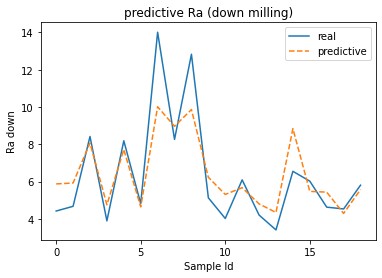

In [143]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

In [144]:
lr.intercept_

18.822222353250158

In [145]:
lr.coef_

array([-6.76936098e-04,  2.47879762e-01, -9.23056272e+01,  1.28188428e-03])

In [162]:
def Ra(x):
    spindle_speed = x[0]
    ap = x[1]
    fz = x[2]
    vbs = 2*fz*spindle_speed
    return -6.76936098e-04*spindle_speed + 2.47879762e-01*ap -9.23056272e+01*fz + 1.28188428e-03*vbs + 18.822222353250158

In [153]:
y_pred2 = Ra([x_test.spindle_speed, x_test.ap, x_test.fz,])

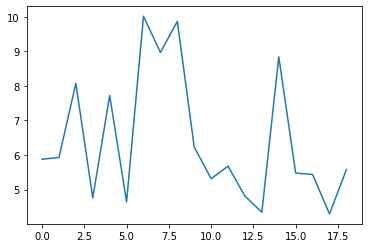

In [157]:
plt.plot(y_pred2.values)

In [100]:
all_data

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.83250   800  23.664093     917.580527   
1     2           8000  0.2  0.065   6.47625  1040  28.025455    1817.287671   
2     3           8000  0.2  0.075   8.42100  1200  24.258964    2600.600669   
3     4           8000  0.2  0.100   6.81600  1600  23.584906    4141.970983   
4     5           8000  0.4  0.050  12.51250   800  43.182927    1232.354156   
..  ...            ...  ...    ...       ...   ...        ...            ...   
95   96          16000  0.8  0.100   2.92575  3200  32.663636  126860.571274   
96   97          16000  1.0  0.050   6.09400  1600  16.813433   51788.152328   
97   98          16000  1.0  0.065   4.09975  2080  27.814126   85863.219053   
98   99          16000  1.0  0.075   3.23825  2400  17.141361   95383.532543   
99  100          16000  1.0  0.100   3.47700  3200  56.746269  131887.060299   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446   
1    50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851   
2    56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590   
3    68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957   
4    55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138   
..         ...       ...  ...       ...       ...       ...       ...   
95  356.862502     607.0  ...    1466.0     965.0  0.074937  2.450916   
96  227.766557     382.0  ...    1387.0     802.0 -0.135212  2.042409   
97  293.798656     524.0  ...    1447.0     918.0 -0.046218  2.144651   
98  308.509268     455.0  ...    1411.0     872.0 -0.158009  2.660414   
99  366.675667     590.0  ...    1550.0    1148.0 -0.217817  2.358557   

    robot_t8  robot_t9    clamp_f1   clamp_f2    robot_f1   robot_f2  
0   1.164723  1.162811   12.222404  19.191919   22.863227  14.646465  
1   1.125636  1.123908   17.382572  21.717172   25.495338  31.313131  
2   1.214723  1.212308   20.770490  21.717172   37.602301  31.313131  
3   1.221912  1.217963   27.491432  21.717172   39.944840   5.050505  
4   1.154345  1.152213   18.159337   9.595960   33.502295   6.060606  
..       ...       ...         ...        ...         ...        ...  
95  1.481595  1.447160  243.671946  21.212121   76.110895  40.909091  
96  1.401067  1.376350  146.029390  21.212121   83.654707  40.909091  
97  1.457688  1.424433  218.904376  21.212121  100.091163  38.383838  
98  1.428614  1.402853  263.678931   0.505051   90.098039  40.909091  
99  1.566924  1.513719  231.174047  21.212121   79.552251  40.909091  

[95 rows x 28 columns]

In [158]:
bnds = Bounds(lb=(8000, 0.2, 0.05), ub=(16000, 1.0, 0.1))

In [159]:
bnds

Bounds(array([8.e+03, 2.e-01, 5.e-02]), array([1.6e+04, 1.0e+00, 1.0e-01]))

In [160]:
x0 = np.array([10000, 0.6, 0.075])
res = minimize(Ra, x0, method='TNC', bounds=bnds, tol=1e-10)

In [161]:
res.x

array([1.6e+04, 2.0e-01, 1.0e-01])

Optimum of linear function lies always on edge